# Machine Learning Workflow using Watson Studio

In [1]:
# The code was removed by DSX for sharing.

## Data Acquisition

Download the Red/White wine dataset from Kaggle website.
https://www.kaggle.com/numberswithkartik/red-white-wine-dataset/data

1. Login to IBM Cloud account at __bluemix.net__. 
2. Click on Create Resource and look for Watson Studio. 
3. Enter a name and click Create.
4. Create a New Project. Head over to Assets tab and upload the wine_dataset.csv.
5. Note that creating an instance of Watson Studio automatically creates an IBM Cloud Object Storage service. This is where all the config files + the data assets for Watson Studio Projects are saved.
6. Using the Add to Project, we can add in several Data Connections ranging from CloudantNoSQL Database to Amazon S3 and more.
7. Click on Add to Project > Notebook. 
8. Enter a name. Default runtime will suffice. Click Create Notebook.
9. Open the Files tab on the right-hand side. Insert to code > Insert Pandas DataFrame.


In [2]:
# The code was removed by DSX for sharing.

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,style
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


## Data Exploration
Using df.info() and df.describe(), we can find more about the quality of our dataset. 

1. df.info() gives a concise summary of the dataframe.
2. df.describe() provides the descriptive statistics of the dataframe’s distribution.

In [3]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
fixed_acidity           6497 non-null float64
volatile_acidity        6497 non-null float64
citric_acid             6497 non-null float64
residual_sugar          6497 non-null float64
chlorides               6497 non-null float64
free_sulfur_dioxide     6497 non-null float64
total_sulfur_dioxide    6497 non-null float64
density                 6497 non-null float64
pH                      6497 non-null float64
sulphates               6497 non-null float64
alcohol                 6497 non-null float64
quality                 6497 non-null int64
style                   6497 non-null object
dtypes: float64(11), int64(1), object(1)
memory usage: 659.9+ KB


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


## Data Preparation
The label column, "style" has strings - red/white. We need to convert the categorical to numerical so we can use it for predictions. 
<br>
Let's have a column called "type" with values, white = 0 and red = 1.

In [4]:
style_df_dummies = pd.get_dummies(df["style"])
df = pd.concat([df, style_df_dummies], axis=1)
df = df.drop(columns=["style", "white"])

#Rename the column appropriately
df = df.rename(columns={"red": "type"})
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,1


## Data Visualization
Visualizing the data helps us understand the trends and convert the numerical information into a clear quantitative message.
<br>
Watson Studio has plenty of Data Visualization packages already installed. To get a list of all the packages available, try "!pip freeze".
<br>
If you need to install additional Python packages, try "!pip install <packagename\>"


Let's visualize the frequency of the distinct values in the dataframe's features.

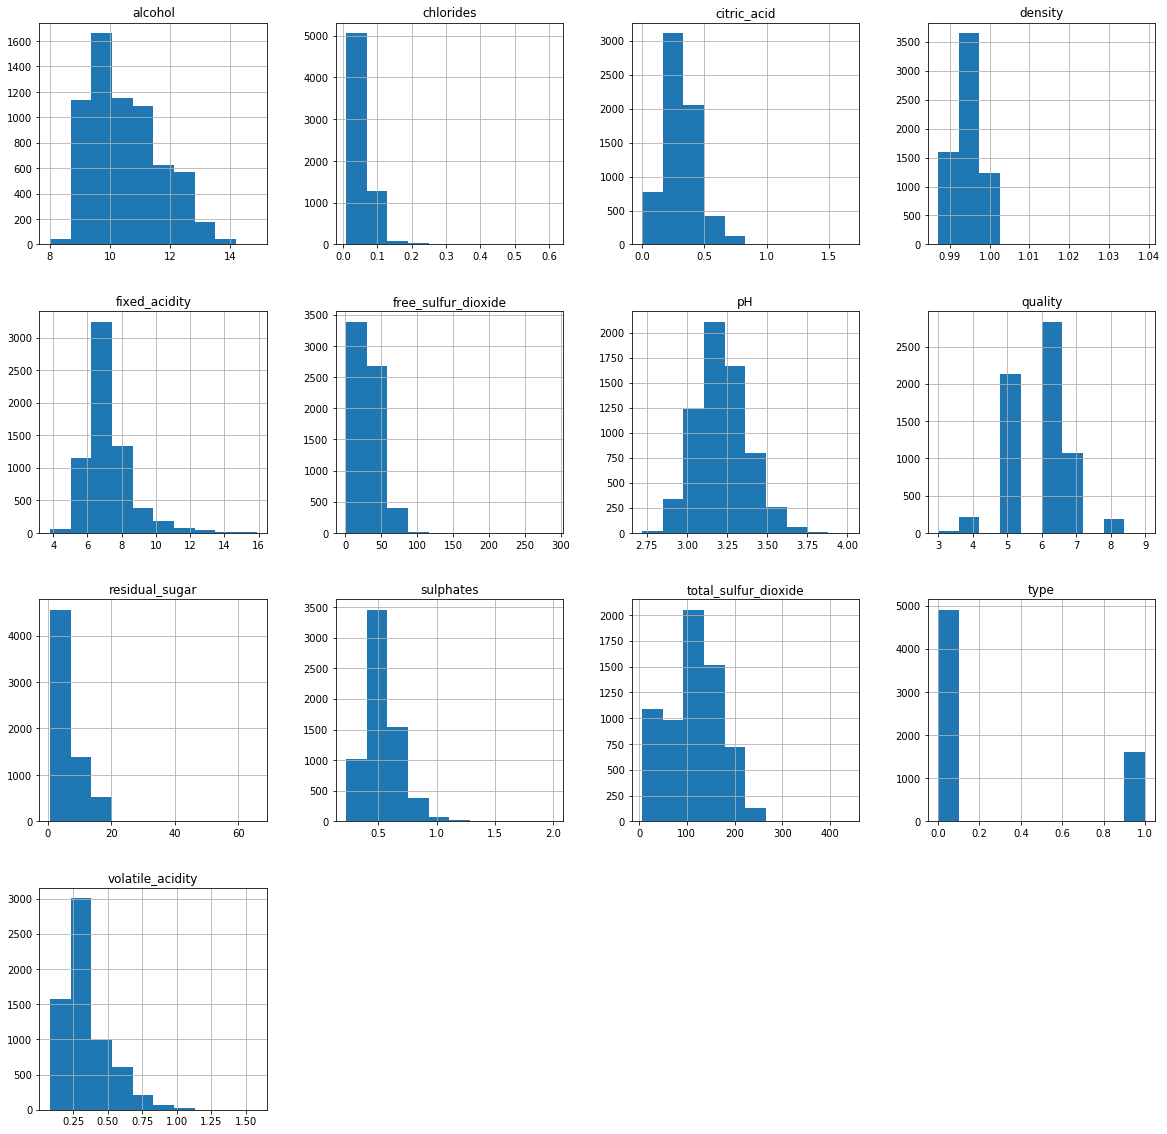

In [5]:
df.hist(bins=10,figsize=(20,20),grid=True);

Since we already have MatplotLib installed, we can use Seaborn to make beautiful plots. 
<br>
If you want to learn more about seaborn and MatplotLib, check this https://www.datacamp.com/community/tutorials/seaborn-python-tutorial
<br>


Let's create Regression Plots for "type" vs. other features. A positive slope of the regression plot means that higher the value, the more likely it is to be the red wine.

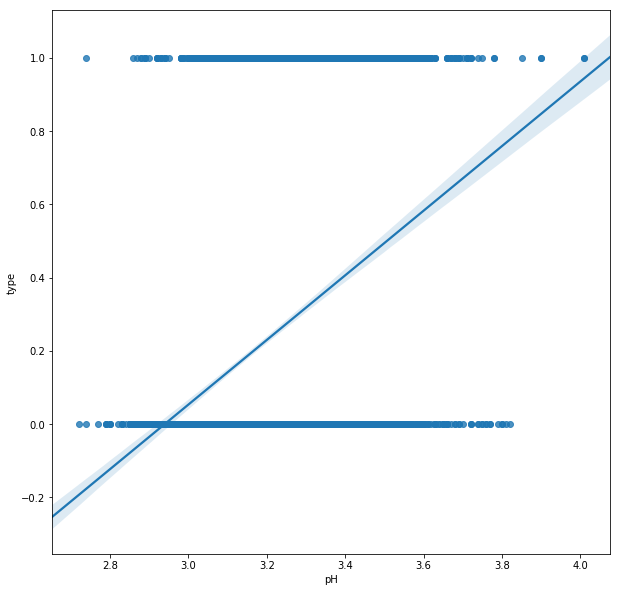

In [6]:
fig, ax = plt.subplots()
fig.set_size_inches(10,10)
sns.regplot(x=df["pH"], y=df["type"], ax=ax)

We can use Pearson Correlation of Features to identify the correlation between the features of the dataframe. 

The Pearson's coefficient, r has a value between +1 and −1, where 1 is total positive linear correlation, 0 is no linear correlation, and −1 is total negative linear correlation.

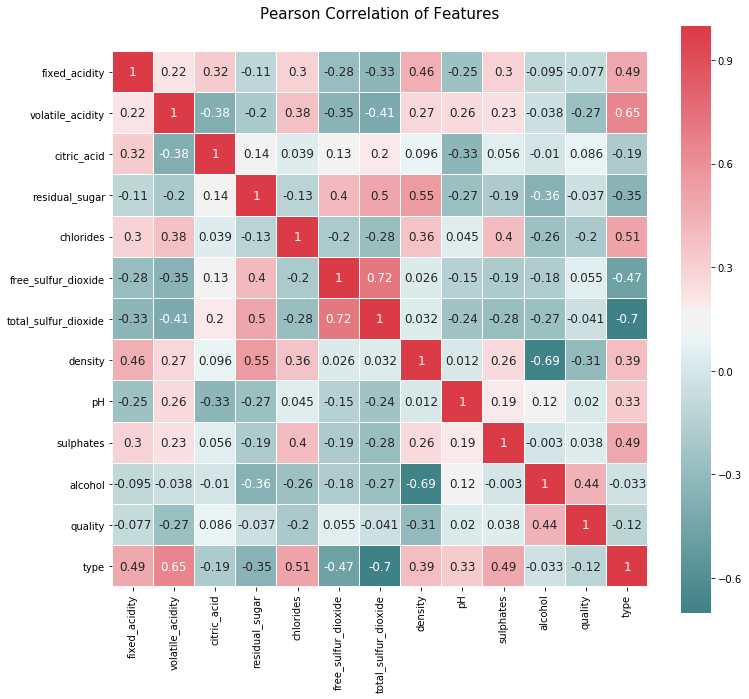

In [7]:
def correlation_heatmap(df):
    _ , ax = plt.subplots(figsize =(12, 12))
    colormap = sns.diverging_palette(200, 10, as_cmap = True)
    
    _ = sns.heatmap(
        df.corr(), 
        cmap = colormap,
        square=True, 
        cbar_kws={'shrink':.9 }, 
        ax=ax,
        annot=True, 
        linewidths=0.05,vmax=1.0, linecolor='white',
        annot_kws={'fontsize':12 }
    )
    
    plt.title('Pearson Correlation of Features', y=1.05, size=15)

correlation_heatmap(df)

## Feature Engineering
Refining the data and picking the best features to include for the model training. 
<br>
Try Value Binning, Log Transforms, Round the values to create better features.  

In [8]:
X = df.drop(columns=["type"])
y = df["type"]

In [9]:
## Model Selection, Model Training

In [10]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=4)
 
clf = DecisionTreeClassifier()
model = clf.fit(X_train, y_train)

prediction = model.predict (X_test)
print (prediction)

[0 1 0 ..., 0 0 1]


In [11]:
## Model Evaluation 

In [12]:
print ("Accuracy score of the model is: ", accuracy_score(prediction,y_test)*100)
print ("Precision score of the model is: ", precision_score(prediction,y_test)*100)
print ("Recall score of the model is: ", recall_score(prediction,y_test)*100)

Accuracy score of the model is:  98.041958042
Precision score of the model is:  95.3703703704
Recall score of the model is:  96.8045112782


## Model Deployment
Let's save the model as a pickle and store it in IBM Cloud. 

In [13]:
import pickle

filename = 'finalized_model.sav'
pickle.dump(model, open(filename, 'wb'))

In [14]:
# The code was removed by DSX for sharing.

## Next Steps

Deploy the pickled model into a Flask app. Expose it as an API to be used by a Web/Mobile Front End. 
<br>
Here are some links that can help you get started,
1. https://xcitech.github.io/tutorials/heroku_tutorial/
2. https://www.analyticsvidhya.com/blog/2017/09/machine-learning-models-as-apis-using-flask/

In [15]:
df.to_csv("wine_data_shaped2.csv", sep=',', encoding='utf-8')
client_eed5325e29044fc28bcef6302c03b21a.upload_file('wine_data_shaped2.csv', credentials_1['BUCKET'],'wine_data_shaped2.csv')

In [16]:
 project.save_data("wine_shaped2.csv", df.to_csv(index=False), overwrite=True)

{'asset_id': 'c9f4920c-78b6-47c8-8e1f-53683f341ba4',
 'bucket_name': 'nextaimachinelearning-donotdelete-pr-fg3igxrqisq7mi',
 'file_name': 'wine_shaped2.csv',
 'message': 'File wine_shaped2.csv has been written successfully to the associated OS'}